
### Exercise 6.1
* To start with, create the function g, gd = gaussian1DKernel(sigma), where g is the 1D Gaus-
sian kernel, gd is the derivative of g, and sigma is the Gaussian width.
In this function, you have a choice: what length should the Gaussian kernel have? What is the
error in the truncation when setting the length to sigma, 2 · sigma, or 6 · sigma?
No matter which length you end up choosing you should normalize g such that it sums to 1.


In [100]:
import cv2 
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 


def gaussian1DKernel(sigma):

    s = sigma * 6
    x = np.arange(-s,s+1).reshape(-1,1)

    g = np.exp(-x**2/(2*sigma**2))
    g /= np.sum(g) 

    gd = -x/(sigma ** 2) * g 
    

    return g,gd 


def gaussianSmoothing(im,sigma):
    g,gd = gaussian1DKernel(sigma) 
    
    i = cv2.sepFilter2D(im,-1,g,g) 

    i = cv2.normalize(i, None, 0, 1.0,cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    iy = cv2.sepFilter2D(i,-1,g,gd)
    ix = cv2.sepFilter2D(i,-1,gd,g) 

    return i,ix,iy


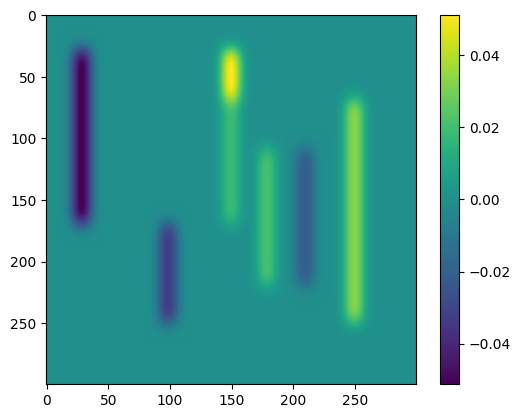

In [15]:

folder_path = "../Data/week06_data/" 

img_path = "TestIm1.png"
img = cv2.imread(folder_path + img_path).astype(float).mean(2)/255


i,ix,iy = gaussianSmoothing(img,5)
plt.imshow(ix)
plt.colorbar()
plt.show()

In [101]:
def structureTensor(im, sigma, epsilon):

    i,ix,iy = gaussianSmoothing(im,sigma)
    g_epsilon,_ = gaussian1DKernel(epsilon)
    N,M = i.shape

    C_00 = cv2.sepFilter2D(ix**2,-1,g_epsilon,g_epsilon)
    C_diag = cv2.sepFilter2D(ix*iy,-1,g_epsilon,g_epsilon)
    C_01 = cv2.sepFilter2D(iy**2,-1,g_epsilon,g_epsilon)

    C = np.array([[C_00,C_diag],[C_diag,C_01]])

    return C 


def harrisMeasure(im,sigma,epsilon,k):
    
    C = structureTensor(im,sigma,epsilon)
    a,b,c = C[0,0] , C[1,1],C[1,0]
    r = a*b-c**2 - k*(a+b)**2 

    return r

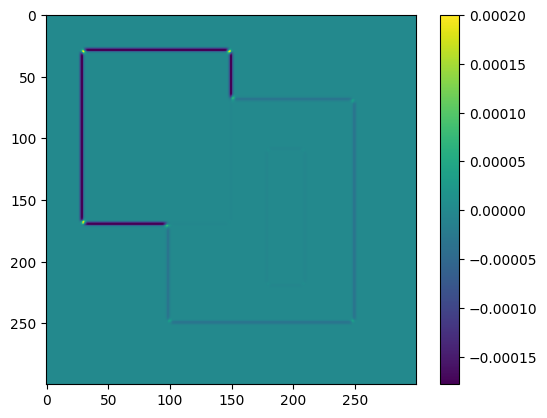

In [102]:
r = harrisMeasure(img,1,1,0.06)
plt.imshow(r)
plt.colorbar()
plt.show()

## Exercise 6.5

* Finally, create the function c = cornerDetector(im, sigma, epsilon, k, tau) where c is a
list of points where r is the local maximum and larger than some relative threshold i.e.
r(x, y) > tau.


* To get local maxima, you should implement non-maximum suppression, see the slides or Sec. 4.3.1
in the LN. Non-maximum suppression ensures that r(x, y) > r(x ± 1, y) and r(x, y) > r(x, y ± 1).
Once you have performed non-maximum suppression you can find the coordinates of the points
using np.where.
Use the corner detector on your test image. Does it find all the corners, or too many corners?

In [103]:
def nonmax_supr(r,x,y):

    if x == 0 or y == 0 or x == r.shape[0] - 1 or y == r.shape[1] - 1:
        return False
    
    return (r[x, y] > r[x+1, y]) and (r[x, y] >= r[x-1, y]) and (r[x, y] > r[x, y+1]) and (r[x, y] >= r[x, y-1])

    


def cornerDetector(im,sigma,epsilon,k,tau):
    r = harrisMeasure(im,sigma,epsilon,k) 
    corner_mask = np.zeros_like(r,dtype=bool)

    N,M = r.shape 

    for x in range(N-1):
        for y in range(M-1):
            if r[x,y] > tau:
                
                if nonmax_supr(r,x,y):
                    corner_mask[x,y] = True 
    

    corners = np.argwhere(corner_mask) 
    
    return corners
            

In [116]:
cornerDetector(img,1,2,0.06,0.000001)

array([[ 30,  30],
       [ 30, 148],
       [ 67, 151],
       [ 70, 248],
       [110, 180],
       [110, 208],
       [168,  30],
       [168, 148],
       [171,  97],
       [218, 180],
       [218, 208],
       [248, 100],
       [248, 248]], dtype=int64)

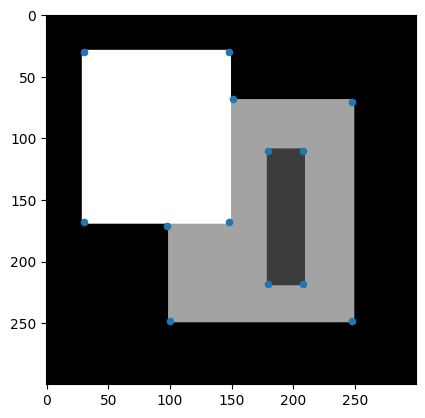

In [131]:
corners = cornerDetector(img,1,1,0.06,0.0000001)

plt.imshow(img,cmap="gray")
plt.scatter(corners[:,1],corners[:,0],s=20)

### Exercise 6.6
* Figure out how to run the Canny edge detector in your language and apply it to the two images TestIm1.png and TestIm2.png

In [132]:
img1_path = "TestIm1.png"
img2_path = "TestIm2.png"

img1 = cv2.imread(folder_path + img1_path) 
img2 = cv2.imread(folder_path + img2_path)

gray_1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)


blurred_1 = cv2.GaussianBlur(gray_1,(5,5),0)
blurred_2 = cv2.GaussianBlur(gray_2,(5,5),0)


edge_1 = cv2.Canny(blurred_1,150,200)
edge_2 = cv2.Canny(blurred_2,50,200)



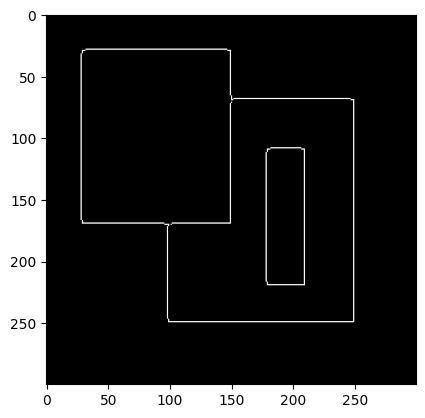

In [133]:
plt.imshow(edge_1,cmap="gray")

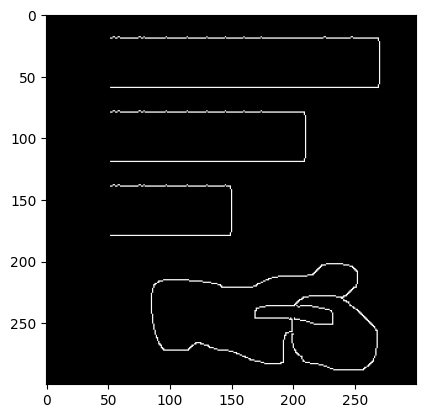

In [134]:
plt.imshow(edge_2,cmap="gray")